For anyone who wants to work on this dataset, here's where you can [download it](https://www.kaggle.com/aungpyaeap/supermarket-sales/code).

In [43]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Load and read the data
data = pd.read_csv('supermarket_sales - Sheet1.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
#Display number of rows and columns
print('There are {} rows and {} columns in our dataset.'.format(data.shape[0], data.shape[1]))

There are 1000 rows and 17 columns in our dataset.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
# check for any duplicates
data.duplicated().sum()

0

In [10]:
# confirm there's no missing values
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
# Get overall statistics of our data
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


### 1. Which Month was the best for sales and which branch had the most sales ?

In [12]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [14]:
# Create a month column for our analysis
data['Month'] = data['Date'].str[0:1]
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


In [15]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,1
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,3
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,2
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,2
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6,2


As we can see from the above displayed dataframe. Cogs in this dataset is equal to Sales, they are calculated the same way. Sales = Unit Price * Qunatity Sold. Since the tax portion of total selling price is excluded from sales(Revenue), we will use the cogs column to answer the sales related questions. 

In [17]:
data.groupby('Month').sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Month,,,,,,,,
1,19753.89,1965,5537.708,116291.868,110754.16,1676.190476,5537.708,2470.2
2,17159.52,1654,4629.494,97219.374,92589.88,1442.857143,4629.494,2142.6
3,18758.72,1891,5212.167,109455.507,104243.34,1642.857143,5212.167,2359.9


In [18]:
data.groupby(['Month', 'Branch'])['cogs'].sum().to_frame()

cogs
Month Branch          
1     A       36839.17
      B       35405.77
      C       38509.22
2     A       28438.21
      B       32785.02
      C       31366.65
3     A       35865.83
      B       32949.85
      C       35427.66

In [87]:
data.groupby('Branch')['cogs'].sum().to_frame()

,cogs
Branch,
A,101143.21
B,101140.64
C,105303.53


#####  January or Month 1 has the highest number of sales and branch C had the most sales. 

### 2. At what time of the day do we make the most sales and at which branch? 

In [19]:
data['Time'].dtype

dtype('O')

In [20]:
#Convert Time dtype to a numeric one
data['hour'] = data['Time'].str[0:2].astype('int')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,10


In [21]:
data.hour.dtype

dtype('int64')

In [22]:
data.groupby('hour').sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
hour,,,,,,,,
10,5820.38,525,1496.2610,31421.4810,29925.22,480.952381,1496.2610,716.9
11,5112.64,513,1446.5395,30377.3295,28930.79,428.571429,1446.5395,612.6
12,4475.95,501,1241.2325,26065.8825,24824.65,423.809524,1241.2325,649.7
13,5599.27,585,1653.4870,34723.2270,33069.74,490.476190,1653.4870,724.1
14,4765.65,495,1468.0190,30828.3990,29360.38,395.238095,1468.0190,575.6
15,5481.48,530,1484.7385,31179.5085,29694.77,485.714286,1484.7385,701.4
16,4646.75,420,1201.2535,25226.3235,24025.07,366.666667,1201.2535,528.2
17,4204.53,415,1164.0580,24445.2180,23281.16,352.380952,1164.0580,513.5
18,4823.38,475,1239.5400,26030.3400,24790.80,442.857143,1239.5400,668.4


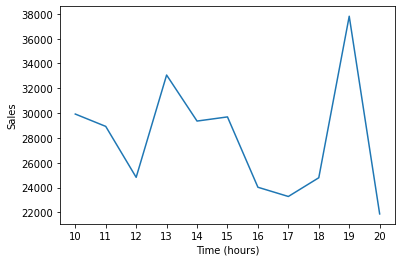

In [23]:
#Visualize the results
hourly_sales = data.groupby('hour')['cogs'].sum()
hours = [hour for hour, df in data.groupby('hour')]

plt.plot(hours, hourly_sales)
plt.xticks(hours)
plt.xlabel('Time (hours)')
plt.ylabel('Sales')
plt.show()

In [24]:
data.groupby(['Branch', 'hour'])['cogs'].sum().to_frame()

cogs
Branch hour          
A      10    10674.68
       11    10809.42
       12     9033.40
       13     9946.43
       14     8430.87
       15    10736.86
       16    10352.13
       17     8613.08
       18     7092.40
       19     9838.34
       20     5615.60
B      10     8443.66
       11     9982.68
       12     8071.82
       13    10735.63
       14    11137.68
       15     9753.49
       16     3927.20
       17     7467.67
       18     9100.27
       19    15488.05
       20     7032.49
C      10    10806.88
       11     8138.69
       12     7719.43
       13    12387.68
       14     9791.83
       15     9204.42
       16     9745.74
       17     7200.41
       18     8598.13
       19    12482.67
       20     9227.65

In [25]:
data.groupby('hour')['cogs'].sum().to_frame()

,cogs
hour,
10,29925.22
11,28930.79
12,24824.65
13,33069.74
14,29360.38
15,29694.77
16,24025.07
17,23281.16
18,24790.80


##### Most sales are made at 7pm and this could be because people have knocked off at work , also the store closes at 8pm, people could be rushing to make last minute purchases. Most of these sales are made at Branch B. 

### 3. What product line sells the most and at each branch which product line sells the most? 

In [99]:
data.groupby('Product line')['cogs'].sum().to_frame()

,cogs
Product line,
Electronic accessories,51750.03
Fashion accessories,51719.90
Food and beverages,53471.28
Health and beauty,46851.18
Home and lifestyle,51297.06
Sports and travel,52497.93


###### Food and beverages is the most selling product line followed by Sports & travel .

In [26]:
data.groupby(['Branch', 'Product line'])['cogs'].sum().to_frame()

cogs
Branch Product line                    
A      Electronic accessories  17444.87
       Fashion accessories     15554.77
       Food and beverages      16345.81
       Health and beauty       11997.86
       Home and lifestyle      21349.71
       Sports and travel       18450.19
B      Electronic accessories  16239.47
       Fashion accessories     15631.73
       Food and beverages      14490.37
       Health and beauty       19029.20
       Home and lifestyle      16713.49
       Sports and travel       19036.38
C      Electronic accessories  18065.69
       Fashion accessories     20533.40
       Food and beverages      22635.10
       Health and beauty       15824.12
       Home and lifestyle      13233.86
       Sports and travel       15011.36

##### At Branch A, Home and lifestyle is the most selling product line. At branch B, Sports and travel is the most selling product line. At Branch C, Food and beverages is the most selling product line. 

### 4. Which Gender spends most of its money at our stores and at each branch which gender spends the most ? 

In [32]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month', 'hour'],
      dtype='object')

In [33]:
data.groupby(['Branch', 'Gender'])['cogs'].sum().to_frame()

cogs
Branch Gender          
A      Female  50732.54
       Male    50410.67
B      Female  50407.90
       Male    50732.74
C      Female  58748.06
       Male    46555.47

In [34]:
data.groupby('Gender')['cogs'].sum()

Gender
Female    159888.50
Male      147698.88
Name: cogs, dtype: float64

### 5 . Which Customer type (Member or Normal) makes the most purchases ? 

In [37]:
data.groupby('Customer type')['cogs'].sum()

Customer type
Member    156403.28
Normal    151184.10
Name: cogs, dtype: float64

### 6. Are most of our sales cash, card or ewallet sales ? 

In [38]:
data['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [39]:
data.groupby('Payment')['cogs'].sum().to_frame()

,cogs
Payment,
Cash,106863.40
Credit card,95968.64
Ewallet,104755.34


<AxesSubplot:xlabel='Payment', ylabel='count'>

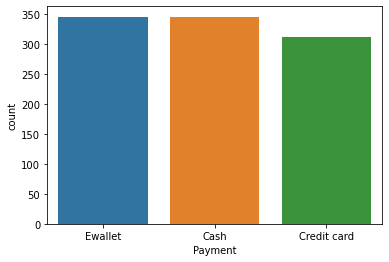

In [44]:
sns.countplot(data['Payment'])

#### As we can see most sales are cash sales, our store must start accepting cryptos 🤑. 

In [57]:
# Display Correlations 
data.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,hour
Unit price,1.000000e+00,1.077756e-02,6.339621e-01,6.339621e-01,6.339621e-01,-6.998957e-16,6.339621e-01,-8.777507e-03,8.242210e-03
Quantity,1.077756e-02,1.000000e+00,7.055102e-01,7.055102e-01,7.055102e-01,-3.849075e-16,7.055102e-01,-1.581490e-02,-7.316886e-03
Tax 5%,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02,-2.770440e-03
Total,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.408632e-16,1.000000e+00,-3.644170e-02,-2.770440e-03
cogs,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.439279e-15,1.000000e+00,-3.644170e-02,-2.770440e-03
gross margin percentage,-6.998957e-16,-3.849075e-16,2.461896e-16,2.408632e-16,1.439279e-15,1.000000e+00,2.461896e-16,2.042714e-15,-2.114722e-16
gross income,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02,-2.770440e-03
Rating,-8.777507e-03,-1.581490e-02,-3.644170e-02,-3.644170e-02,-3.644170e-02,2.042714e-15,-3.644170e-02,1.000000e+00,-3.058764e-02
hour,8.242210e-03,-7.316886e-03,-2.770440e-03,-2.770440e-03,-2.770440e-03,-2.114722e-16,-2.770440e-03,-3.058764e-02,1.000000e+00
